In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
import matplotlib.pyplot as plt

# Set the correct file path for the medical df
medical_file_path = "medical_clean.csv"
# Read the medical df file with keep_default_na
df = pd.read_csv(medical_file_path, keep_default_na=False, index_col=0)

In [2]:

# Code to check for duplicates
has_duplicates = df.duplicated().any()
print("Duplicates present:", has_duplicates)

# Check for missing data
missing_data = df.isnull().sum()

# Display the missing data counts
print("Missing data counts:")
print(missing_data)

# Display data types
df.info()

# Visually inspect df
pd.set_option("display.max_columns", None)
df.head(5)

Duplicates present: False
Missing data counts:
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge      

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [3]:
# Label encode binary categorical columns
label_encoder = LabelEncoder()
binary_columns = ['ReAdmis', 'HighBlood', 'Stroke', 'Overweight', 'Diabetes', 'Asthma']
for col in binary_columns:
    df[f'{col}_encoded'] = label_encoder.fit_transform(df[col])

# Check for missing values after label encoding
print("Missing values after label encoding:")
print(df[[f'{col}_encoded' for col in binary_columns]].isnull().sum())

Missing values after label encoding:
ReAdmis_encoded       0
HighBlood_encoded     0
Stroke_encoded        0
Overweight_encoded    0
Diabetes_encoded      0
Asthma_encoded        0
dtype: int64


In [4]:
# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)

# Encode categorical columns
initial_admin_encoded = one_hot_encoder.fit_transform(df[['Initial_admin']])
initial_admin_encoded_df = pd.DataFrame(initial_admin_encoded, columns=one_hot_encoder.get_feature_names_out(['Initial_admin']))

services_encoded = one_hot_encoder.fit_transform(df[['Services']])
services_encoded_df = pd.DataFrame(services_encoded, columns=one_hot_encoder.get_feature_names_out(['Services']))

gender_encoded = one_hot_encoder.fit_transform(df[['Gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=one_hot_encoder.get_feature_names_out(['Gender']))

# Concatenate the encoded DataFrames
df_combined = pd.concat([df, initial_admin_encoded_df, services_encoded_df, gender_encoded_df], axis=1)

# Check for missing values after concatenation
print("Missing values after concatenation:")
print(df_combined.isnull().sum())

# Handle missing values (if any)
# Fill missing values for numeric columns
numeric_columns = df_combined.select_dtypes(include=['number']).columns
df_combined[numeric_columns] = df_combined[numeric_columns].fillna(df_combined[numeric_columns].median())

# Fill missing values for non-numeric columns
non_numeric_columns = df_combined.select_dtypes(exclude=['number']).columns
df_combined[non_numeric_columns] = df_combined[non_numeric_columns].fillna('Unknown')

# Check for missing values after handling
print("Missing values after handling:")
print(df_combined.isnull().sum())

# Drop original categorical columns
df_combined.drop(['ReAdmis', 'Gender', 'Initial_admin', 'HighBlood', 'Stroke', 'Overweight', 'Diabetes', 'Asthma', 'Services'], axis=1, inplace=True, errors='ignore')

# Select columns for the decision tree model
selected_columns = [
    'Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 
    'Initial_days', 'TotalCharge', 'Additional_charges'
] + list(initial_admin_encoded_df.columns) + list(services_encoded_df.columns) + list(gender_encoded_df.columns) + [f'{col}_encoded' for col in binary_columns if col != 'ReAdmis']

# Create new DataFrame for the decision tree
tree_df = df_combined[selected_columns].assign(ReAdmis=df['ReAdmis_encoded'])

# Check for missing values in the final DataFrame
print("Missing values in the final DataFrame:")
print(tree_df.isnull().sum())

# Display the final DataFrame
print(tree_df.head())


Missing values after concatenation:
Customer_id             1
Interaction             1
UID                     1
City                    1
State                   1
                       ..
Services_Intravenous    1
Services_MRI            1
Gender_Female           1
Gender_Male             1
Gender_Nonbinary        1
Length: 65, dtype: int64
Missing values after handling:
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
                       ..
Services_Intravenous    0
Services_MRI            0
Gender_Female           0
Gender_Male             0
Gender_Nonbinary        0
Length: 65, dtype: int64
Missing values in the final DataFrame:
Population                             0
Children                               0
Age                                    0
Income                                 0
VitD_levels                            0
Doc_visits                             0
Full_meals_eaten          

In [5]:
# Save tree_df to a CSV file
tree_df.to_csv("tree_df.csv", index=False)
print("tree_df has been saved to tree_df.csv.")


tree_df has been saved to tree_df.csv.


In [6]:
# Ensure there are no missing values in the target column
tree_df = tree_df.dropna(subset=['ReAdmis'])

# Separate features and target variable
X = tree_df.drop('ReAdmis', axis=1)
y = tree_df['ReAdmis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Combine the training features and target into a single DataFrame
train_tree_df = pd.concat([X_train, y_train], axis=1)
test_tree_df = pd.concat([X_test, y_test], axis=1)

# Save the train and test DataFrames to CSV files
train_tree_df.to_csv("train_tree_df.csv", index=False)
test_tree_df.to_csv("test_tree_df.csv", index=False)

print("train_tree_df has been saved to 'train_tree_df.csv'.")
print("test_tree_df has been saved to 'test_tree_df.csv'.")


train_tree_df has been saved to 'train_tree_df.csv'.
test_tree_df has been saved to 'test_tree_df.csv'.


In [7]:


# Determine the number of nodes in the tree
num_nodes = decision_tree.tree_.node_count
print(f"Number of nodes in the tree: {num_nodes}")

# Determine the depth of the tree
tree_depth = decision_tree.get_depth()
print(f"Depth of the tree: {tree_depth}")

# Determine the number of leaves on the tree
num_leaves = decision_tree.get_n_leaves()
print(f"Number of leaves in the tree: {num_leaves}")


Number of nodes in the tree: 255
Depth of the tree: 15
Number of leaves in the tree: 128


Feature: Population, Importance: 0.005720613597536295
Feature: Children, Importance: 0.000744792411459078
Feature: Age, Importance: 0.0030873390482064455
Feature: Income, Importance: 0.005774427197958855
Feature: VitD_levels, Importance: 0.006066572333393101
Feature: Doc_visits, Importance: 0.0016856557554231974
Feature: Full_meals_eaten, Importance: 0.003967164296597794
Feature: vitD_supp, Importance: 0.0009471610426348745
Feature: Initial_days, Importance: 0.9410222936321186
Feature: TotalCharge, Importance: 0.01290904888798858
Feature: Additional_charges, Importance: 0.00745738559529948
Feature: Initial_admin_Elective Admission, Importance: 0.0004766671433338099
Feature: Initial_admin_Emergency Admission, Importance: 0.0
Feature: Initial_admin_Observation Admission, Importance: 0.001147677618265853
Feature: Services_Blood Work, Importance: 0.0006032818532818532
Feature: Services_CT Scan, Importance: 0.0
Feature: Services_Intravenous, Importance: 0.0006256256256256255
Feature: Servic

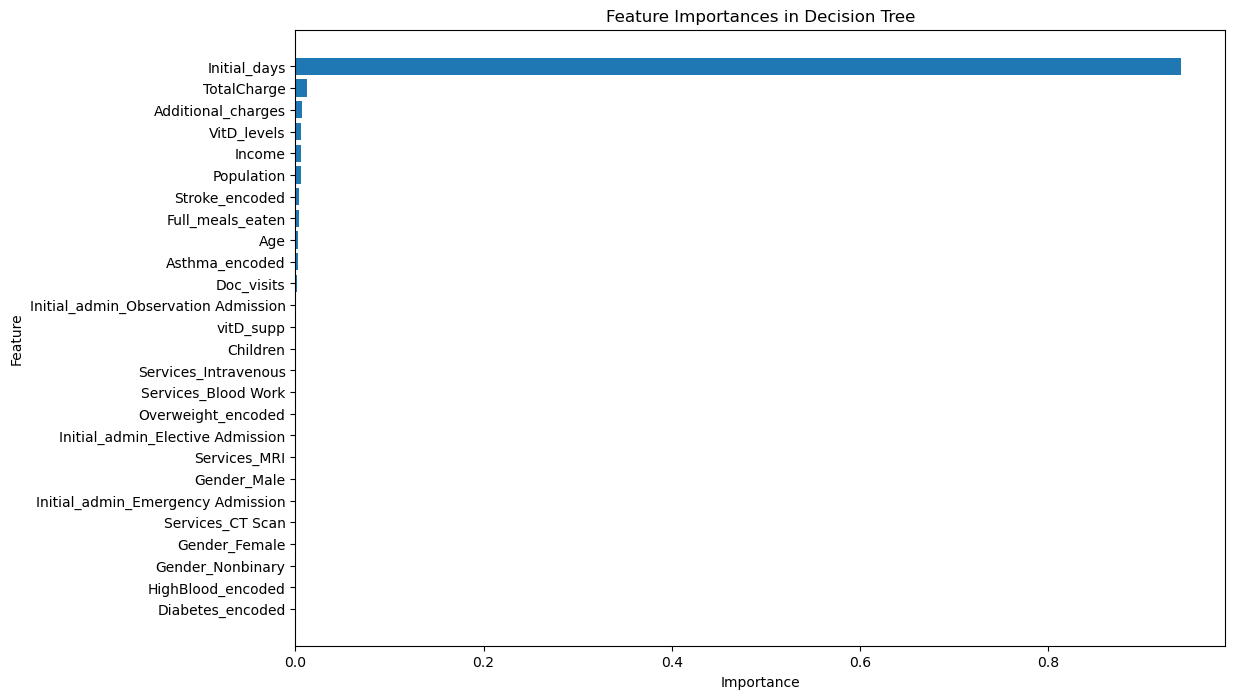

In [8]:
# Determine feature importances
feature_importances = decision_tree.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree')
plt.gca().invert_yaxis()
plt.show()

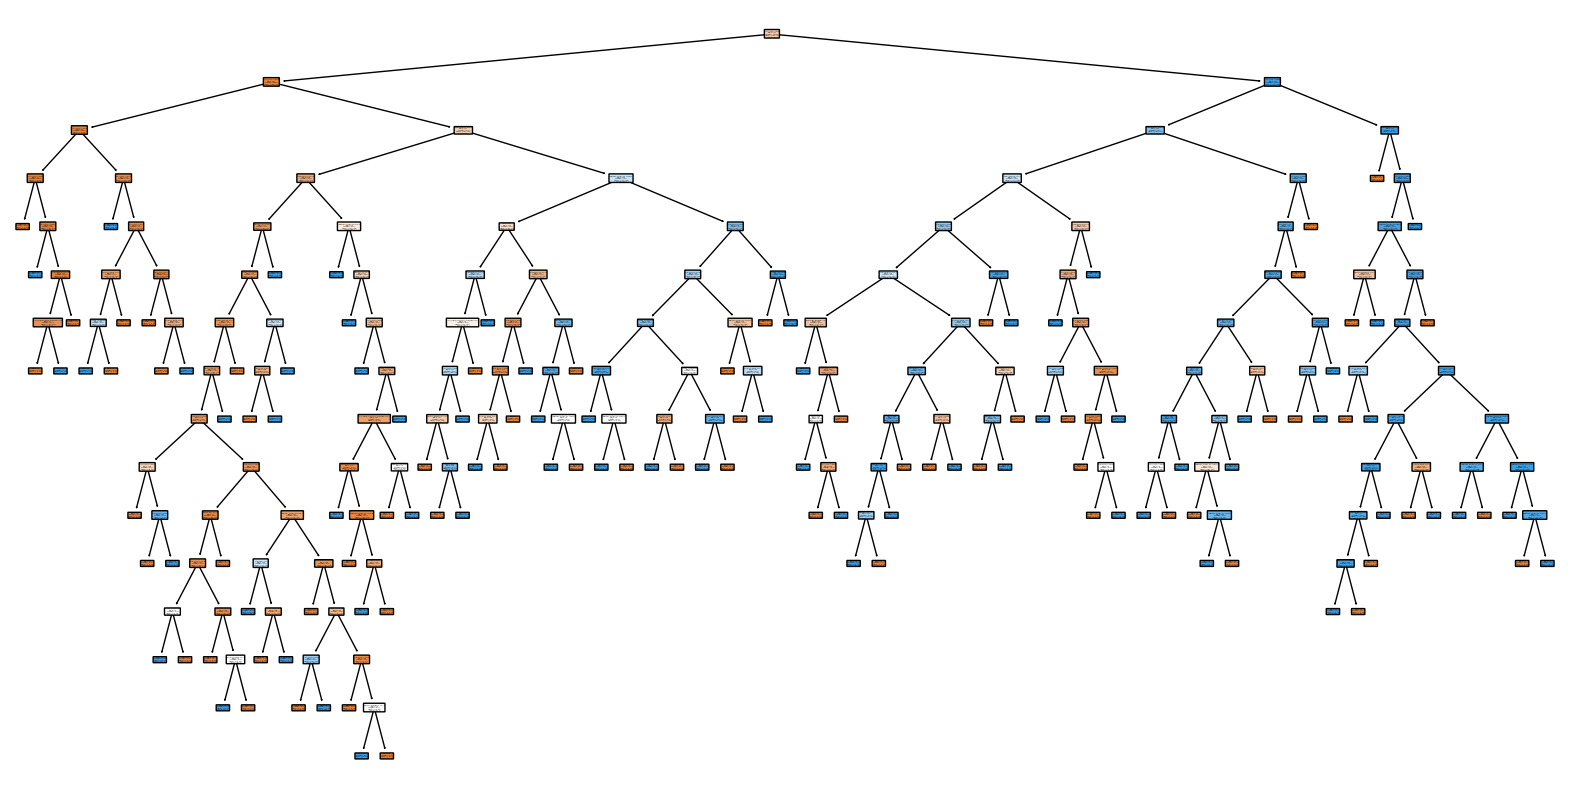

In [9]:


# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(
    decision_tree, 
    feature_names=list(X.columns), 
    class_names=["Class 0", "Class 1"], 
    filled=True, 
    rounded=True, 
    proportion=True, 
    precision=2
)
plt.show()

In [10]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_decision_tree = grid_search.best_estimator_

# Train the pruned decision tree on the entire training set
best_decision_tree.fit(X_train, y_train)

# Make predictions
y_pred = best_decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Mean Squared Error:", mse)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.9765
Confusion Matrix:
 [[1271   20]
 [  27  682]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1291
         1.0       0.97      0.96      0.97       709

    accuracy                           0.98      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       0.98      0.98      0.98      2000

Mean Squared Error: 0.0235


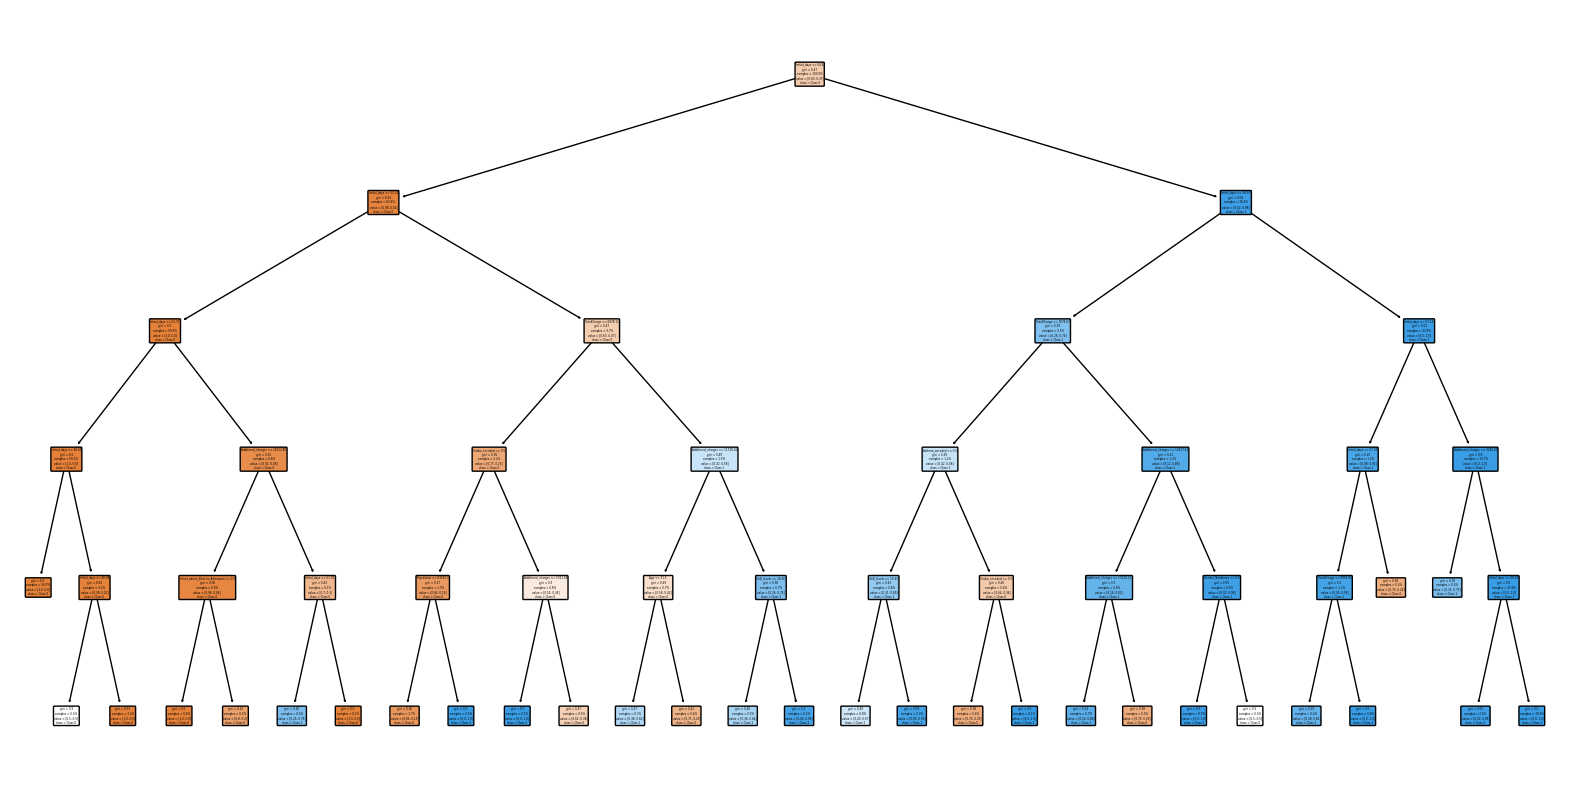

In [12]:
 #Visualize the pruned decision tree
plt.figure(figsize=(20,10))
plot_tree(
    best_decision_tree, 
    feature_names=list(X.columns), 
    class_names=["Class 0", "Class 1"], 
    filled=True, 
    rounded=True, 
    proportion=True, 
    precision=2
)
plt.show()